# Задание

Задание 1: Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg

Задание 2: Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.

Задание 3: Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

# Импорт библиотек

In [40]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

# Исходное изображение

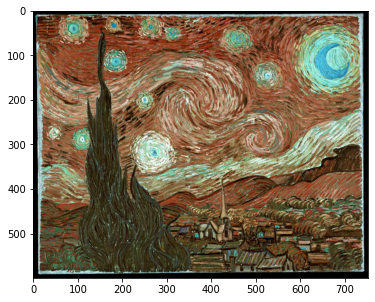

In [41]:
image = cv.imread("starry_night.jpg")

f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.imshow(image)

# Задание 1: BGR to RGB

In [42]:
def BGR_to_RGB(image: np.ndarray):
   
    b = image[:,:,0]
    g = image[:,:,1]
    r = image[:,:,2]

    rgb = np.stack((r,g,b), axis=2)

    return rgb

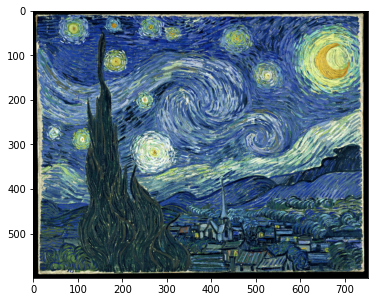

In [43]:
image_rgb = BGR_to_RGB(image)

f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.imshow(image_rgb)

# Задание 2: Перестановка элементов на изображении

### Вариант 1: Квадратное окно

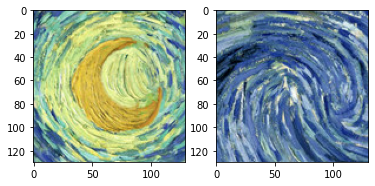

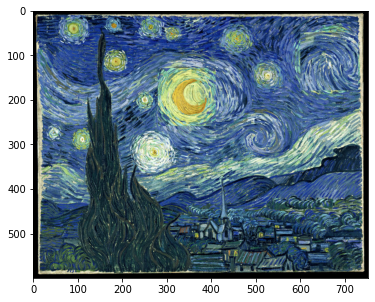

In [44]:
image_rgb = BGR_to_RGB(image)
image_rgb = np.array(image_rgb)

window_size = 130

moon = image_rgb[50:50+window_size:, 600:600+window_size:].copy()
swirl = image_rgb[130:130+window_size:, 280:280+window_size:].copy()

## Перестановка квадратным окном
image_rgb[50:50+window_size:, 600:600+window_size:] = swirl
image_rgb[130:130+window_size:, 280:280+window_size:] = moon

f, ax = plt.subplots(1,2) 
ax[0].imshow(moon)
ax[1].imshow(swirl)

f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.imshow(image_rgb)


### Вариант 2: Квадратное окно с круглой маской

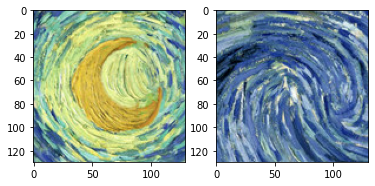

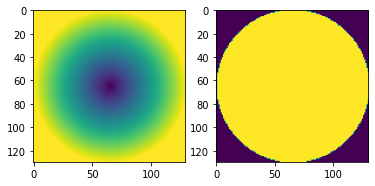

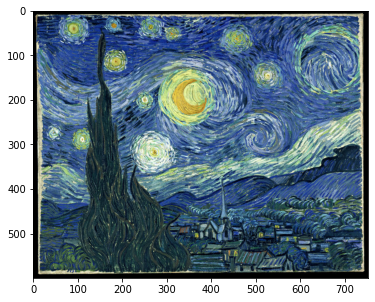

In [45]:
image_rgb = BGR_to_RGB(image)
image_rgb = np.array(image_rgb)

window_size = 130

moon_slice = image_rgb[50:50+window_size:, 600:600+window_size:]
swirl_slice = image_rgb[130:130+window_size:, 280:280+window_size:]

moon = moon_slice.copy()
swirl = swirl_slice.copy()

## маска
x,y = np.ogrid[:window_size, :window_size]
center = window_size / 2

circle = np.sqrt((center - x)**2 + (center - y)**2) / window_size * 2
circle = circle.clip(min=0, max=1)

circle_bool_mask = circle < 1
circle_bool_mask = circle_bool_mask[:,:,np.newaxis]


## Перестановка квадратным окном по круглой маске
moon_slice[:] = ~circle_bool_mask * moon + circle_bool_mask * swirl
swirl_slice[:] = ~circle_bool_mask * swirl + circle_bool_mask * moon

## Вывод окон
f, ax = plt.subplots(1,2) 
ax[0].imshow(moon)
ax[1].imshow(swirl)

## Вывод
f, ax = plt.subplots(1,2)
ax[0].imshow(circle)
# f.colorbar(ax[0].imshow(circle))
ax[1].imshow(circle_bool_mask)

f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.imshow(image_rgb)


### Вариант 3: Квадратное окно с фактором смешивания

Круглая маска выступает в качестве фактора поканального смешивания. 

Значения в каждом канале смешиваются через линейную интерполяцию: At + B(1-t)

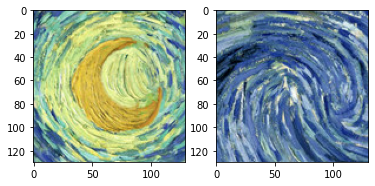

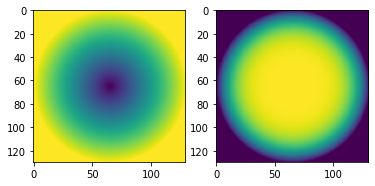

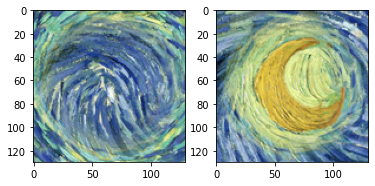

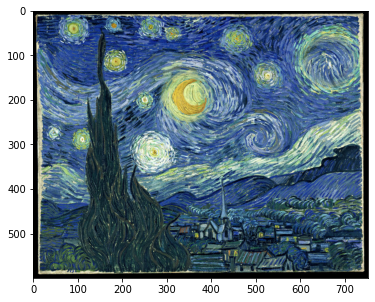

In [46]:
image_rgb = BGR_to_RGB(image)
image_rgb = np.array(image_rgb)

window_size = 130

moon_slice = image_rgb[50:50+window_size:, 600:600+window_size:]
swirl_slice = image_rgb[130:130+window_size:, 280:280+window_size:]

moon = moon_slice.copy()
swirl = swirl_slice.copy()

## Заполнение маски
x,y = np.ogrid[:window_size, :window_size]
center = window_size / 2

circle = np.sqrt((center - x)**2 + (center - y)**2) / window_size * 2
circle = circle.clip(min=0, max=1)
circle = circle[:,:, np.newaxis]

## Создание и постпроцессинг маски
circle_mask = circle.copy()
circle_mask **= 5
circle_mask = 1 - circle_mask

## Перестановка квадратным окном с фактором смешивания
## Степень здесь для того, чтобы увеличить площадь малых значений в circle
moon_slice[:] = swirl * circle_mask + moon * (1 - circle_mask)
swirl_slice[:] = moon * circle_mask + swirl * (1 - circle_mask)



## Вывод окон
f, ax = plt.subplots(1,2) 
ax[0].imshow(moon)
ax[1].imshow(swirl)

## Вывод
f, ax = plt.subplots(1,2)
ax[0].imshow(circle)
ax[1].imshow(circle_mask)

## Вывод окон
f, ax = plt.subplots(1,2) 
ax[0].imshow(moon_slice[:])
ax[1].imshow(swirl_slice[:])


f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.imshow(image_rgb)


# Задание 3: Смена дня и ночи

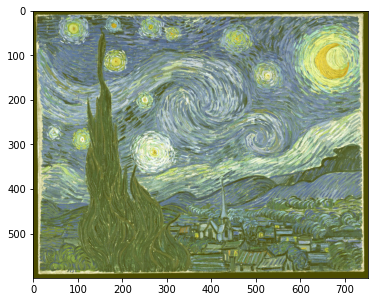

In [47]:
image_rgb = BGR_to_RGB(image)
image_rgb = np.array(image_rgb)

image_rgb[:,:,0] += np.uint8(0.3 * (255 - image_rgb[:,:,0])) # Добавить красного
image_rgb[:,:,1] += np.uint8(0.3 * (255 - image_rgb[:,:,1])) # Добавить зелёного
image_rgb[:,:,2] += np.uint8(0.0 * (255 - image_rgb[:,:,2])) # Добавить синего

f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.imshow(image_rgb)